In [2]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.index = df.timestamp
del df['tot_rate']
del df['timestamp']
df.columns = ['level', 'rain']
df = df[10000:30000]



In [41]:
df['time_since_update'] = None
df['last_update'] = None

update = 0
time_since_update = 0
for i, r in df.iterrows():
    if time_since_update >= update:
        recorded_level = df.loc[i, 'level']
        update = random.randint(10,100)
        time_since_update = 0
        print i
    else:
        time_since_update = time_since_update + 1

    df.loc[i, 'time_since_update'] = time_since_update
    df.loc[i, 'last_update'] = recorded_level




2008-04-14 04:00:00
2008-04-14 14:00:00
2008-04-15 02:15:00
2008-04-15 23:00:00
2008-04-16 01:45:00
2008-04-17 00:15:00
2008-04-17 06:45:00
2008-04-18 03:45:00
2008-04-18 09:30:00
2008-04-19 05:15:00
2008-04-19 23:15:00
2008-04-20 20:45:00
2008-04-21 09:45:00
2008-04-22 08:30:00
2008-04-22 16:15:00
2008-04-22 21:30:00
2008-04-23 17:15:00
2008-04-24 01:15:00
2008-04-25 01:45:00
2008-04-25 09:45:00
2008-04-25 17:45:00
2008-04-26 11:15:00
2008-04-26 17:30:00
2008-04-26 22:45:00
2008-04-27 08:15:00
2008-04-27 13:30:00
2008-04-28 04:30:00
2008-04-28 12:15:00
2008-04-29 13:00:00
2008-04-30 11:15:00
2008-05-01 01:15:00
2008-05-01 05:15:00
2008-05-01 18:00:00
2008-05-02 00:15:00
2008-05-02 14:30:00
2008-05-03 02:30:00
2008-05-04 03:00:00
2008-05-04 12:00:00
2008-05-05 09:45:00
2008-05-06 01:15:00
2008-05-06 10:30:00
2008-05-06 20:00:00
2008-05-07 08:45:00
2008-05-07 11:45:00
2008-05-08 01:30:00
2008-05-08 16:45:00
2008-05-09 06:15:00
2008-05-09 14:45:00
2008-05-09 19:15:00
2008-05-10 12:00:00


In [42]:
df.head()

,level,rain,time_since_update,last_update
timestamp,,,,
2008-04-14 04:00:00,0.369,0.0,0,0.369
2008-04-14 04:15:00,0.368,0.0,1,0.369
2008-04-14 04:30:00,0.368,0.0,2,0.369
2008-04-14 04:45:00,0.367,0.0,3,0.369
2008-04-14 05:00:00,0.366,0.0,4,0.369


In [43]:
# 100 equates to roughly 24 hours
n_features = 2000
y = df.level[n_features:].values
y = np.reshape(y, (y.shape[0], 1)).astype('float32')


y = df.level[n_features:].values
y = np.reshape(y, (y.shape[0], 1)).astype('float32')
y.shape


(18000, 1)

In [44]:
x = df[['rain', 'last_update', 'time_since_update']].copy()
for i in range(1, n_features):
    x['rain' + str(i)] = x['rain'].shift(i)
x = x[n_features:].values.astype('float32')
x.shape


(18000, 2002)

In [57]:
# Add bias terms...
#n_samples = x.shape[0]
#x = np.reshape(np.c_[np.ones(n_samples),x],[n_samples,n_features + 3])

print (np.c_[np.ones(n_samples),x], [n_samples,n_features + 3])


(array([[ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.]]), [18000, 2003])


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)
def get_train_inputs():
    x = tf.constant(x_train)
    y = tf.constant(y_train)
    return x, y

def input_fn_predict_train(): # returns x, None
    x = tf.constant(x_train)
    return x

def input_fn_predict_test(): # returns x, None
    x = tf.constant(x_test)
    return x

In [31]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=n_features)]

estimator = tf.contrib.learn.DNNRegressor(
    feature_columns=feature_columns,
    hidden_units=[5, 5, 5],
    optimizer=tf.train.ProximalAdagradOptimizer(
      learning_rate=0.01,
      l1_regularization_strength=0.001
    ))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x120c74690>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}


In [32]:
estimator.fit(input_fn = get_train_inputs, steps=2000)


Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.


KeyboardInterrupt: 

In [23]:
predictions_test = np.array(list(estimator.predict(input_fn=input_fn_predict_test)))
predictions_train = np.array(list(estimator.predict(input_fn=input_fn_predict_train)))


Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
INFO:tensorflow:Restoring parameters from /var/folders/2m/hrvmvlnn0wl1kldf9bhp06qc0000gn/T/tmpNlBBJb/model.ckpt-2000
Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
INFO:tensorflow:Restoring parameters from /var/folders/2m/hrvmvlnn0wl1kldf9bhp06qc0000gn/T/tmpNlBBJb/model.ckpt-2000


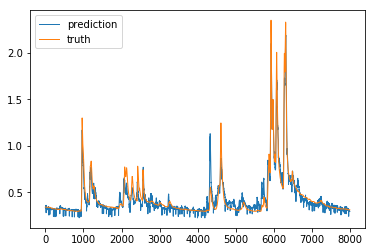

In [35]:
fig, ax = plt.subplots( nrows=1, ncols=1)  # create figure & 1 axis

#ax.plot(0.4 + df.rain.values[:1500]/10, linewidth=.5)

ax.plot(predictions_train,  label='prediction', linewidth=1)
ax.plot(y_train,  label='truth', linewidth=1)
plt.legend()
plt.savefig('foo.png')
plt.legend(loc='upper left')


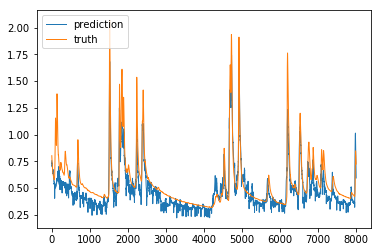

In [34]:
fig, ax = plt.subplots( nrows=1, ncols=1)  # create figure & 1 axis

#ax.plot(0.4 + df.rain.values[:1500]/10, linewidth=.5)

ax.plot(predictions_test,  label='prediction', linewidth=1)
ax.plot(y_test,  label='truth', linewidth=1)
plt.legend()
plt.savefig('foo.png')
plt.legend(loc='upper left')


In [29]:
from sklearn.metrics import explained_variance_score, r2_score

In [30]:
print explained_variance_score(y_train, predictions_train)
print explained_variance_score(y_test, predictions_test)

0.921238541603
0.823286533356
